## Opgave 2

In [18]:
# First, import the modules you want to use:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from probfit import BinnedLH, Chi2Regression, Extended, UnbinnedLH # Helper tool for fitting
import sys
import scipy
from scipy import stats
from scipy.special import erfc
import re

### 2.1.1

In [19]:
with_val = np.array([2.05, 2.61, 2.46, 2.48])
with_err = np.array([0.11, 0.10, 0.13, 0.12])
with_out = np.array([2.69, 2.71, 2.56, 2.48, 2.34, 2.79, 2.54, 2.68, 2.69, 2.58, 2.66, 2.70])

In [20]:
print(f"mean with error for values without:  {np.mean(with_out):.5f}+/-{np.std(with_out/np.sqrt(len(with_out))):.5f}")
print(f"mean with error for values with err: {np.mean(with_val):.5f}+/-{np.mean(with_err)/np.sqrt(4):.5f}")

mean with error for values without:  2.61833+/-0.03415
mean with error for values with err: 2.40000+/-0.05750


In [21]:
mean_err = np.mean(with_err)/np.sqrt(4)
mean = np.mean(with_val)
mean_wo = np.mean(with_out)
mean_wo_err = np.std(with_out/np.sqrt(len(with_out)))

def func(a, s1):
    return (a-mean) / np.sqrt(s1**2 + mean_err**2)

def sigmas(x, mu, sigma):
    return (x - mu) / sigma

In [22]:
print("For a two sample test, we calculate the difference to the mean:")
print(f"For value: {with_val[0]} we have a difference of: {func(with_val[0], with_err[0]):.5f} sigmas to the mean")
print(f"For value: {with_val[1]} we have a difference of: {func(with_val[1], with_err[1]):.5f} sigmas to the mean")
print(f"For value: {with_val[2]} we have a difference of: {func(with_val[2], with_err[2]):.5f} sigmas to the mean")
print(f"For value: {with_val[3]} we have a difference of: {func(with_val[3], with_err[3]):.5f} sigmas to the mean")

For a two sample test, we calculate the difference to the mean:
For value: 2.05 we have a difference of: -2.81981 sigmas to the mean
For value: 2.61 we have a difference of: 1.82050 sigmas to the mean
For value: 2.46 we have a difference of: 0.42209 sigmas to the mean
For value: 2.48 we have a difference of: 0.60121 sigmas to the mean


### 2.2.2

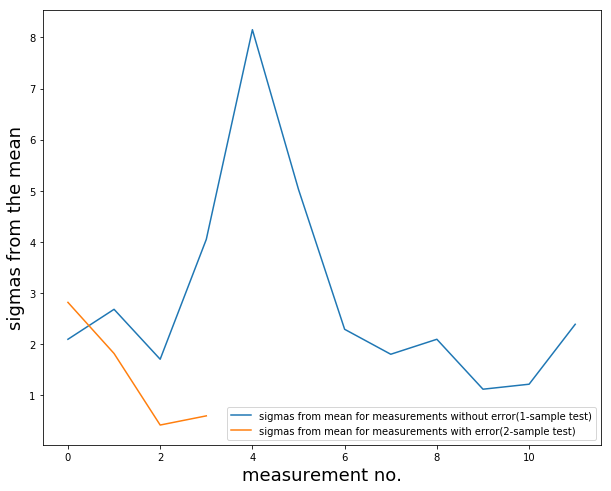

In [23]:
a_list = []
for i in range(len(with_out)):
    #print(sigmas(with_out[i], mean_wo, mean_wo_err))
    a_list.append(abs(sigmas(with_out[i], mean_wo, mean_wo_err)))
b_list = []
for i in range(len(with_val)):
    b_list.append(abs(func(with_val[i], with_err[i])))
#    b_list.append(abs(sigmas(with_val[i], mean, mean_err)))
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(a_list)
ax.plot(b_list)
ax.set_xlabel("measurement no.", fontsize=18)
ax.set_ylabel('sigmas from the mean', fontsize=18)
ax.legend(["sigmas from mean for measurements without error(1-sample test)", "sigmas from mean for measurements with error(2-sample test)"])
#fig.savefig('2_2_2.png', dpi=300)

In [24]:
#not in use
#print(f"mean with error for values without:  {np.mean(with_out):.5f}+/-{np.std(with_out/np.sqrt(len(with_out))):.5f}")
#print(f"mean with error for values with err: {np.mean(with_val[1:]):.5f}+/-{np.mean(with_err[1:])/np.sqrt(3):.5f}")

By looking at the difference in sigmas we see that for the measurements without error we get a lower error but actually the values are generally further from the mean than is the case for the measurements with errors.
For measurements with error: the distance in sigmas is less than 3 for all points (100% vs 99.7%), with two of them (50% vs 68%) being less than 1.
For measurements without error: the distance in sigmas is less than 3 for 9/12 points (75% vs 99.7%), with zero of them (0% vs 68%) being less than 1.

## 2.1.3

In [25]:
with_val = np.array([2.61, 2.46, 2.48])
with_err = np.array([0.10, 0.13, 0.12])
with_out = np.array([2.69, 2.71, 2.56, 2.54, 2.68, 2.69, 2.58, 2.66, 2.70])
mean_err = np.mean(with_err)/np.sqrt(3)
mean = np.mean(with_val)
mean_wo = np.mean(with_out)
mean_wo_err = np.std(with_out/np.sqrt(len(with_out)))

In [26]:
print(f"mean with error for values without:  {np.mean(with_out):.5f}+/-{np.std(with_out)/np.sqrt(len(with_out)):.5f}")
print(f"mean with error for values with err: {np.mean(with_val):.5f}+/-{np.mean(with_err)/np.sqrt(3):.5f}")

mean with error for values without:  2.64556+/-0.02085
mean with error for values with err: 2.51667+/-0.06736


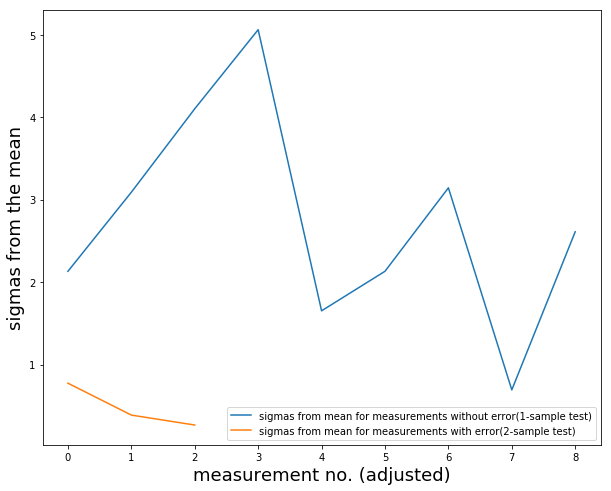

In [28]:
a_list = []
for i in range(len(with_out)):
    #print(sigmas(with_out[i], mean_wo, mean_wo_err))
    a_list.append(abs(sigmas(with_out[i], mean_wo, mean_wo_err)))
b_list = []
for i in range(len(with_val)):
    b_list.append(abs(func(with_val[i], with_err[i])))

fig2, ax2 = plt.subplots(figsize=(10,8))
ax2.plot(a_list)
ax2.plot(b_list)
ax2.set_xlabel("measurement no. (adjusted)", fontsize=18)
ax2.set_ylabel('sigmas from the mean', fontsize=18)
ax2.legend(["sigmas from mean for measurements without error(1-sample test)", "sigmas from mean for measurements with error(2-sample test)"])
#fig.savefig('2_1_3.png', dpi=300)

Its hard to say which is better, even after culling but the measurements without reported uncertainties are still quite bad (only 1 value within 1 sigma)
We will still however still say that many data points are better that a few even though the few "appear" better.

## 2.2
### 2.2.1

Using error propagation in maple: we get 1.932558382e-8 +/- 0.5340221384e-8

### 2.2.2

the function for correlated errors follow the same as for uncorrelated but with the addition of $2*cov*\frac{df}{dv}\frac{df}{dt}$ (under the square root), with the cov being $\rho(v,T)=0.87$

Popping that in maple once again gives:
0.3696745117e-8